In [ ]:
# Montar el drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/My Drive/

Mounted at /content/drive/
[Errno 107] Transport endpoint is not connected: 'drive/My Drive/'
/content/drive/My Drive


In [ ]:
! pip install cftime

In [ ]:
import xarray as xr
import numpy as np
netcdf_file = r'/content/drive/MyDrive/AT/netcdf_dia.nc'
xrds = xr.open_dataset(netcdf_file)
#print(xrds)

Exception ignored in: <function CachingFileManager.__del__ at 0x7b0b80154dc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xarray/backends/file_manager.py", line 250, in __del__
  File "/usr/local/lib/python3.10/dist-packages/xarray/backends/file_manager.py", line 234, in close
  File "/usr/local/lib/python3.10/dist-packages/h5netcdf/core.py", line 1203, in close
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 581, in close
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 355, in h5py.h5f.FileID._close_open_objects
RuntimeError: Can't decrement id ref count (unable to close file, errno = 107, error message = 'Transport endpoint is not connected')


In [ ]:
print(xrds.sizes)

Frozen({'time': 8, 'latitude': 347, 'longitude': 230})


In [ ]:
print(xrds.coords)

Coordinates:
  * time       (time) datetime64[ns] 64B 2024-10-05T17:15:00 ... 2024-10-12T1...
  * latitude   (latitude) float64 3kB -15.63 -15.62 -15.61 ... -12.18 -12.17
  * longitude  (longitude) float64 2kB -75.14 -75.13 -75.12 ... -72.86 -72.85


In [ ]:
print(xrds.data_vars)

Data variables:
    crs_wgs84  int64 8B ...
    t_2m       (time, latitude, longitude) float64 5MB ...


In [ ]:
np.set_printoptions(threshold=np.inf)
datos_lat = xrds.data_vars['t_2m'].values[7,:,:]


In [ ]:
dato_punto = xrds.data_vars['t_2m'].values[7,1,1]
print(dato_punto)

15.917523384094238


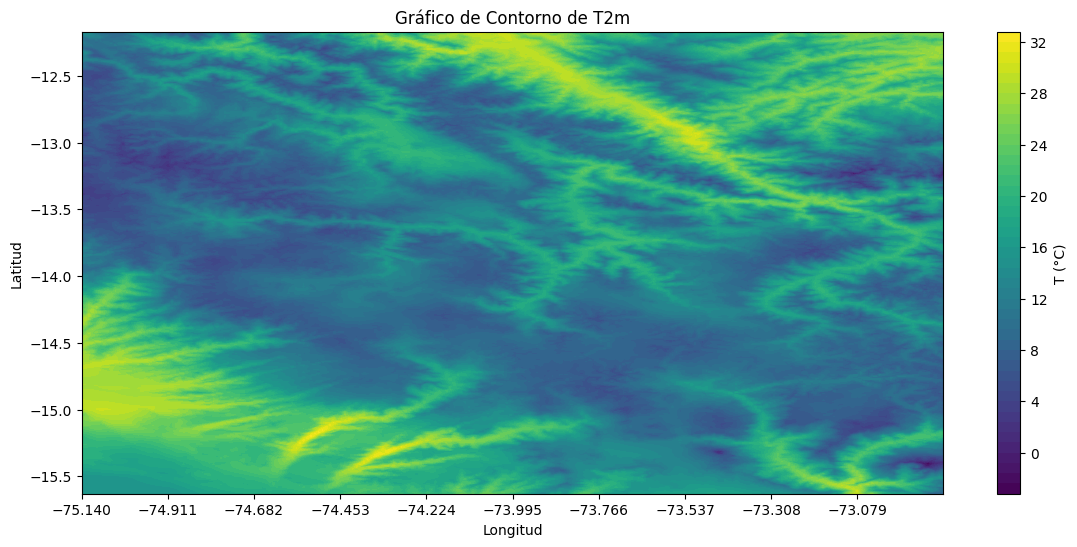

In [ ]:
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

ds = xr.open_dataset(r'//content/drive/MyDrive/AT/netcdf_dia.nc')
P = ds.data_vars['t_2m'].values[7,:,:]
#P_prom = np.mean(P,axis=0)

long = ds.coords['longitude'].values
lat = ds.coords['latitude'].values

plt.figure(figsize=(13.9, 6))
contorno = plt.contourf(long,lat,P,cmap='viridis',levels=50)
plt.colorbar(contorno,label='T (°C)')
plt.title('Gráfico de Contorno de T2m')
plt.xlabel('Longitud')
plt.xticks(np.arange(min(long),max(long),(max(long)-min(long))/10))
plt.ylabel('Latitud')
plt.show()

In [ ]:
print(xrds.coords['time'].values[:])

['2024-10-05T17:15:00.000000000' '2024-10-06T17:15:00.000000000'
 '2024-10-07T17:15:00.000000000' '2024-10-08T17:15:00.000000000'
 '2024-10-09T17:15:00.000000000' '2024-10-10T17:15:00.000000000'
 '2024-10-11T17:15:00.000000000' '2024-10-12T17:15:00.000000000']


In [ ]:
print(xrds.coords['longitude'].values[229])
print(xrds.coords['longitude'].values[0])

-72.84982609999999
-75.1398261


In [ ]:
print(xrds.coords['latitude'].values[346])
print(xrds.coords['latitude'].values[0])

-12.170065000000001
-15.630065


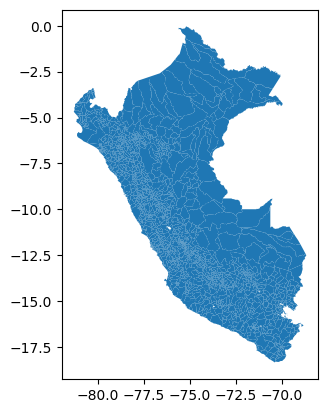

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile
ruta_shapefile = r'/content/drive/MyDrive/AT/DISTRITOS.shp'
data = gpd.read_file(ruta_shapefile)

# Visualizar con plot()
data.plot()

# Mostrar el gráfico
plt.show()


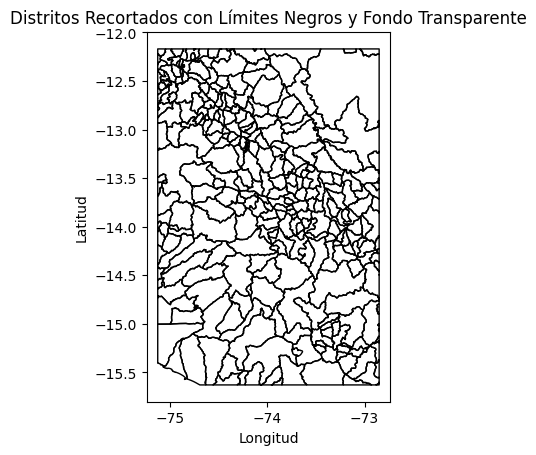

In [ ]:
from shapely.geometry import box
import matplotlib.pyplot as plt

# Cargar el shapefile
ruta_shapefile = r'/content/drive/MyDrive/AT/DISTRITOS.shp'
data = gpd.read_file(ruta_shapefile)

# Definir las coordenadas de la caja delimitadora (bounding box)
# Formato: (min_lon, min_lat, max_lon, max_lat)
bbox = (-75.13, -15.63, -72.85, -12.17)

# Crear el polígono de la caja delimitadora
bounding_box = box(*bbox)

# Convertir la caja delimitadora en un GeoDataFrame
bbox_gdf = gpd.GeoDataFrame([[bounding_box]], columns=['geometry'], crs=data.crs)

# Recortar el shapefile con la caja delimitadora
recorte = gpd.clip(data, bbox_gdf)

# Crear la figura y los ejes para personalizar el gráfico
fig, ax = plt.subplots()

# Personalizar el fondo del gráfico y los bordes
ax.set_facecolor('none')  # Fondo transparente (sin color)
recorte.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Opcional: Agregar etiquetas o títulos
ax.set_title("Distritos Recortados con Límites Negros y Fondo Transparente")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()


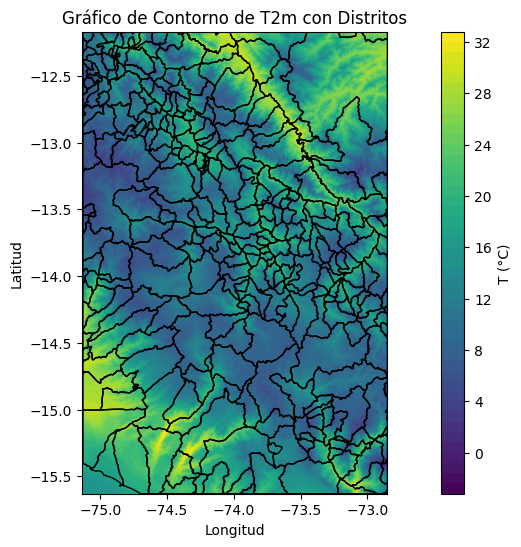

In [ ]:
# Cargar el shapefile
ruta_shapefile = r'/content/drive/MyDrive/AT/DISTRITOS.shp'
data = gpd.read_file(ruta_shapefile)

# Definir las coordenadas de la caja delimitadora (bounding box)
# Formato: (min_lon, min_lat, max_lon, max_lat)
bbox = (-75.13, -15.63, -72.85, -12.17)

# Crear el polígono de la caja delimitadora
bounding_box = box(*bbox)

# Convertir la caja delimitadora en un GeoDataFrame
bbox_gdf = gpd.GeoDataFrame([[bounding_box]], columns=['geometry'], crs=data.crs)

# Recortar el shapefile con la caja delimitadora
recorte = gpd.clip(data, bbox_gdf)

# Abrir el archivo NetCDF
ds = xr.open_dataset(r'/content/drive/MyDrive/AT/netcdf_dia.nc')
P = ds.data_vars['t_2m'].values[7, :, :]
long = ds.coords['longitude'].values
lat = ds.coords['latitude'].values

# Crear una figura y ejes para superponer los gráficos
fig, ax = plt.subplots(figsize=(13.9, 6))

# Graficar el contorno de temperatura
contorno = ax.contourf(long, lat, P, cmap='viridis', levels=50)
plt.colorbar(contorno, ax=ax, label='T (°C)')

# Graficar los distritos recortados sobre el mismo eje
recorte.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Personalizar el gráfico
ax.set_title('Gráfico de Contorno de T2m con Distritos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico combinado
plt.show()


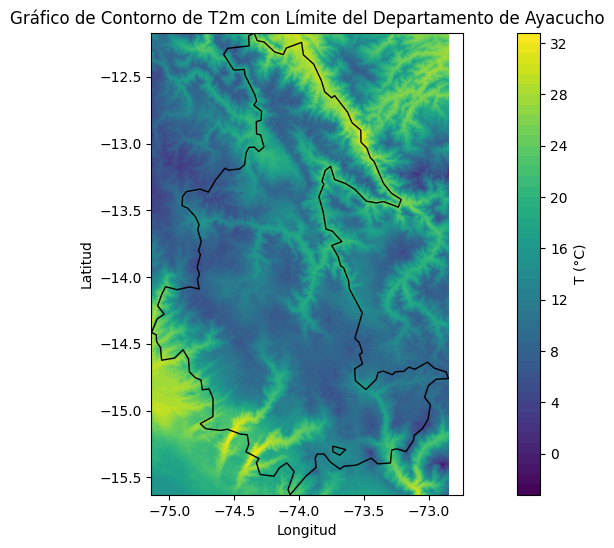

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Abrir el archivo NetCDF
ds = xr.open_dataset(r'/content/drive/MyDrive/AT/netcdf_dia.nc')
P = ds.data_vars['t_2m'].values[7, :, :]
long = ds.coords['longitude'].values
lat = ds.coords['latitude'].values

# Cargar el archivo GeoJSON con geopandas
ruta_geojson = r'/content/drive/MyDrive/AT/peru_departamental_simple.geojson'
data = gpd.read_file(ruta_geojson)

# Filtrar para obtener solo el departamento de Ayacucho
ayacucho = data[data['NOMBDEP'] == 'AYACUCHO']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13.9, 6))

# Graficar el contorno de temperatura sobre los ejes
contorno = ax.contourf(long, lat, P, cmap='viridis', levels=50)
cbar = plt.colorbar(contorno, ax=ax, label='T (°C)')

# Graficar los límites del departamento de Ayacucho sobre el mismo eje
ayacucho.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Personalizar el gráfico
ax.set_title('Gráfico de Contorno de T2m con Límite del Departamento de Ayacucho')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico combinado
plt.show()


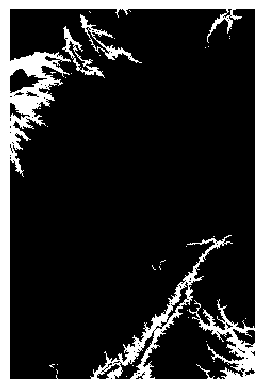

In [ ]:
x = (datos_lat>23) & (datos_lat<28)
#print(x)
plt.imshow(x, cmap='gray', interpolation='nearest')
plt.axis('off')  # Opcional: ocultar los ejes
plt.show()

     COUNT FIRST_IDPR              NOMBPROV    FIRST_NOMB LAST_DCTO LAST_LEY  \
37      13       0403              CARAVELI      AREQUIPA       LEY    12450   
141     10       0508  PAUCAR DEL SARA SARA      AYACUCHO         -        -   
105     11       0408              LA UNION      AREQUIPA         -        -   
137      8       0507          PARINACOCHAS      AYACUCHO         -        -   
113     21       0506               LUCANAS      AYACUCHO         -        -   
9        7       0303             ANTABAMBA      APURIMAC       LEY    13677   
16      17       0304              AYMARAES      APURIMAC       LEY    13787   
171     11       0509                 SUCRE      AYACUCHO       LEY    15231   
6       19       0302           ANDAHUAYLAS      APURIMAC       LEY     9910   
186      1       0510        VICTOR FAFARDO      AYACUCHO       LEY      S/N   
80       4       0503         HUANCA SANCOS      AYACUCHO       LEY    15410   
187     11       0510        VICTOR FAJA

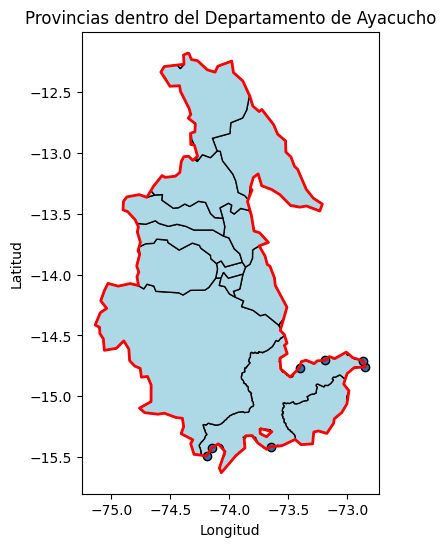

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo provincial
prov_path = r'/content/drive/MyDrive/AT/peru_provincial_simple.geojson'
data_prov = gpd.read_file(prov_path)

# Cargar el archivo departamental para Ayacucho
dept_path = r'/content/drive/MyDrive/AT/peru_departamental_simple.geojson'
data_dept = gpd.read_file(dept_path)

# Filtrar para obtener solo el departamento de Ayacucho
ayacucho = data_dept[data_dept['NOMBDEP'] == 'AYACUCHO']

# Recortar las provincias que están dentro del área de Ayacucho
provincias_ayacucho = gpd.clip(data_prov, ayacucho)

# Mostrar el GeoDataFrame recortado
print(provincias_ayacucho)

# Graficar las provincias dentro de Ayacucho
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el recorte de provincias de Ayacucho
provincias_ayacucho.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth=1)

# Graficar el borde del departamento de Ayacucho
ayacucho.boundary.plot(ax=ax, edgecolor='red', linewidth=2)

# Personalizar el gráfico
plt.title("Provincias dentro del Departamento de Ayacucho")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Mostrar el gráfico
plt.show()

ID;Planta;Patógeno asociado;Días;Tmin;Tmax;RH min;RH max;Resultado
1;Arroz;Magnaporthe oryzae;3;23;28;75;90;Piriculariosis
2;Papa;Phytophthora infestans;1;10;15;75;90;Tizón tardío de la papa
3;Palta;Lasiodiplodia theobromae;3;24;26;81;84;Antracnosis
4;Palta;Cladosporium sp;3;18;28;90;100;Roña
5;Cacao;Monilinia sp;3;22;28;85;100;Moniliasis
6;Cacao;lasiodiplodia theobromae;3;24;26;81;84;Muerte regresiva
7;Cacao;Lasiodiplodia iraniensis;3;26;28;81;84;Muerte regresiva
8;Yuca;cercospora caribaea;3;22;28;70;100;Mancha blanca de la hoja de yuca
9;Yuca;Mycosphaerella henningsii;3;39;43;50;90;Mancha marrón de la hoja
10;Uva;Botrytis cinerea;3;20;22;80;100;Moho gris
11;Uva;Oidium tuckeriBerk;5;21;32;80;100;Oidio de la vid
12;Quinua;Peronosphora variabilis (Mildiu);5;15;25;80;100;Mildiu de la quinua
13;Maiz;Fusarium verticillioides;3;22;27;74;80;Fusariosis
14;Mandarina;Alternaria spp.;3;17;28;77;83;Mancha marron del mandarino
15;Aceituna;Colletotrichum acutatum;3;24;30;85;91;"antracnosis;aceituna jabonosa"
16;;Colletotrichum gloeosporioides;3;18;25;85;90;"antracnosis;aceituna jabonosa"
17;Alfalfa;Stemphylium botryosum;3;22;28;80;100;Mancha foliar por Stemphylium
18;Oregano;Oidium sp.;8;17;28;40;80;Oidiosis
19;Platano;Fusarium oxysporum;3;23;28;74;80;Fusariosis
20;Platano;Mycosphaerella fijiensis;3;21;27;80;86;Sigatoka negra

In [ ]:
import datetime as dt
import meteomatics.api as api
import numpy as np
from shapely.geometry import Point

Custom TB Handler failed, unregistering


In [ ]:
# Make a mask acoording to a polygon object
def make_mask(longitudes, latitudes, polygon, parameter):

    # Uniformize shape
    lons2d, lats2d = np.meshgrid(longitudes, latitudes)

    # Create the mask
    mask = np.array( [ [polygon.contains(Point(lon, lat)) for lon, lat in zip(lon_row, lat_row)] for lon_row, lat_row in zip(lons2d, lats2d) ] )

    # Get the parameter matrix masked
    P_masked = np.where(mask, parameter, np.nan)

    return P_masked

In [ ]:
# No OUTPUT: Downloads filedata.nc
def get_netcdf(coordinates, resolution, parameter, before=0, after=7, model='mix'):

    '''
    Get netcdf file from meteomatics API.
    Coordinates format: [North latitude, West longitude, South Latitude, West longitude]
    Resolutions format: [Latitude Resolution, Longitude Resolution]
    Parameter: Climatologic parameter
    Before: Days before now (past)
    After: Days after now (forecast)
    '''

    # Credentials
    username = 'burgos_alexander'
    password = 'NF0xCcC38p'

    # Coordinates of the area and its resolution
    lat_N, lon_W, lat_S, lon_E = coordinates
    res_lat, res_lon = resolution

    # Date and time limits
    startdate = dt.datetime.utcnow().replace(minute=0, second=0, microsecond=0) - dt.timedelta(days=before)
    enddate = startdate + dt.timedelta(days=after)
    interval = dt.timedelta(hours=12)

    # Parameter name for filename
    parameter_name = parameter.replace(":","")
    # .nc filename
    filename = f"{parameter_name}__{startdate.year}_{startdate.month}_{startdate.day}__{enddate.year}_{enddate.month}_{enddate.day}-{startdate.hour}_{startdate.minute}.nc"
    # filepath
    filepath = './'

    # Query to the meteomatics API
    try:
        api.query_netcdf(filepath+filename, startdate, enddate, interval, parameter,
                        lat_N, lon_W, lat_S, lon_E, res_lat, res_lon, username, password, model)
        print("Filename: {}".format(filename))

    except Exception as e:
        print("Failed, exception is {}.".format(e))

In [ ]:
! pip install cftime

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
nf = r'/content/drive/MyDrive/Colab Notebooks/data_dem/NASADEM_NC.001_30m_aid0001.nc'
nf2 = r'/content/drive/MyDrive/Colab Notebooks/data_dem/NASADEM_NUMNC.001_30m_aid0001.nc'
nf3 = r'/content/drive/MyDrive/Colab Notebooks/data_dem/ASTWBD_NC.001_30m_aid0001.nc'

dem = xr.open_dataset(nf)
dem2 = xr.open_dataset(nf2)
water_body = xr.open_dataset(nf3)

np.set_printoptions(threshold=np.inf)


elevation = dem.data_vars['NASADEM_HGT'].values[0,:,:]
long = dem.coords['lon'].values
lat = dem.coords['lat'].values

water_body_wb = water_body.data_vars['ASTWBD_dem'].values[0,:,:]
long_wb = water_body.coords['lon'].values
lat_wb = water_body.coords['lat'].values


In [ ]:
dem2

<xarray.Dataset> Size: 412MB
Dimensions:      (time: 1, lat: 12466, lon: 8255)
Coordinates:
  * time         (time) object 8B 2000-02-11 00:00:00
  * lat          (lat) float64 100kB -12.17 -12.17 -12.17 ... -15.63 -15.63
  * lon          (lon) float64 66kB -75.14 -75.14 -75.14 ... -72.85 -72.85
Data variables:
    crs          int8 1B ...
    NASADEM_NUM  (time, lat, lon) float32 412MB ...
Attributes:
    title:        NASADEM_NUMNC.001 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.63
    references:   See README.md
    history:      See README.md

In [ ]:

elevation_red = elevation[::10,::10]
long_red = long[::10]
lat_red = lat[::10]

# elevation2 = dem2.data_vars['NASADEM_NUM'].values[0,:,:]
# long2 = dem2.coords['lon'].values
# lat2 = dem2.coords['lat'].values


water_body_red = water_body[::10,::10]
long_wb_red = long_wb[::10]
lat_wb_red = lat_wb[::10]

In [ ]:
dem

<xarray.Dataset> Size: 503MB
Dimensions:      (time: 1, lat: 13385, lon: 9398)
Coordinates:
  * time         (time) object 8B 2000-02-11 00:00:00
  * lat          (lat) float64 107kB -12.09 -12.09 -12.09 ... -15.8 -15.8 -15.8
  * lon          (lon) float64 75kB -75.3 -75.3 -75.3 ... -72.7 -72.69 -72.69
Data variables:
    crs          int8 1B ...
    NASADEM_HGT  (time, lat, lon) float32 503MB nan nan nan nan ... nan nan nan
Attributes:
    title:        NASADEM_NC.001 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.63
    references:   See README.md
    history:      See README.md

In [ ]:
# np.unique(elevation_red)

In [ ]:
elevation_red.shape


(1247, 826)

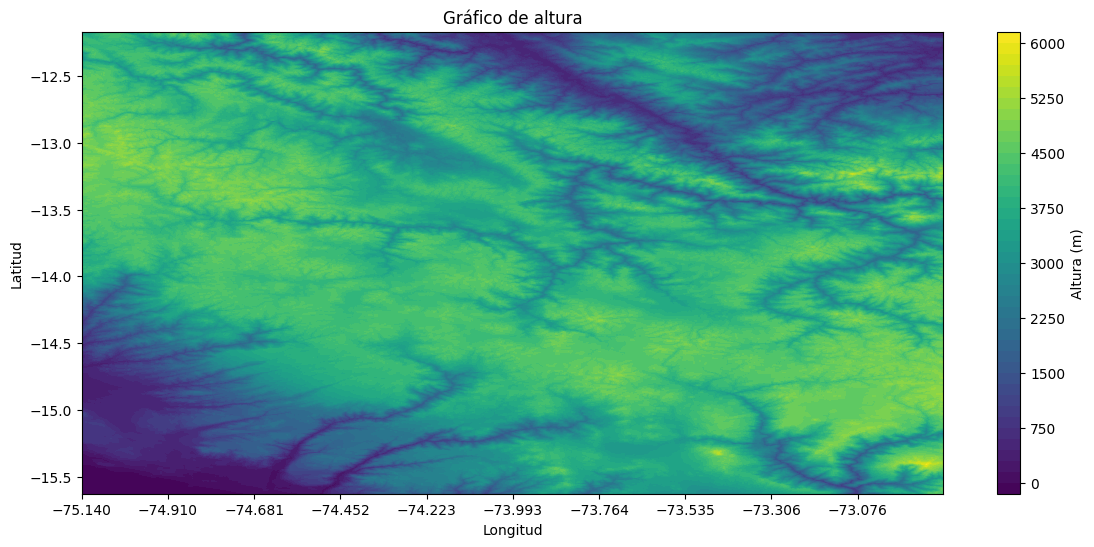

In [ ]:
plt.figure(figsize=(13.9, 6))
contorno = plt.contourf(long_red,lat_red,elevation_red,cmap='viridis',levels=50)
plt.colorbar(contorno,label='Altura (m)')
plt.title('Gráfico de altura')
plt.xlabel('Longitud')
plt.xticks(np.arange(min(long),max(long),(max(long)-min(long))/10))
plt.ylabel('Latitud')
plt.show()